# 0. Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/!_22취준^_^/SWISS_assignment

Mounted at /content/gdrive
/content/gdrive/MyDrive/!_22취준^_^/SWISS_assignment


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

#1. Load Data and EDA

In [ ]:
data = pd.read_csv("AviationData.csv",encoding='cp1252')

print(data.shape)
data.head()

(87282, 31)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 2. Data preprocessing 

This involves:
* 1) drop irrelvant columns and rows 
* 2) missing value removal
* 3) text and date normalization
* 4) data reconstruction 

### 1) Drop 

In [ ]:
# drop columns
irrelevant = ['Event.Id','Investigation.Type', 'Accident.Number','Airport.Code','Registration.Number','Report.Status','Publication.Date', 'Schedule']
data = data.drop(columns = irrelevant)

In [ ]:
data['Aircraft.Category'].value_counts()

Airplane             26343
Helicopter            3268
Glider                 484
Balloon                222
Gyrocraft              162
Weight-Shift           161
Powered Parachute       89
Ultralight              30
Unknown                 14
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [ ]:
# drop rows (filtering commercial airline only)
ca_data = data[data['Aircraft.Category'] == 'Airplane'] 

In [ ]:
print(ca_data.shape)
ca_data.info()
# most of data looks non-null ! 

(26343, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26343 entries, 5 to 87281
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              26343 non-null  object 
 1   Location                26336 non-null  object 
 2   Country                 26336 non-null  object 
 3   Latitude                20985 non-null  object 
 4   Longitude               20976 non-null  object 
 5   Airport.Name            17505 non-null  object 
 6   Injury.Severity         25606 non-null  object 
 7   Aircraft.damage         25137 non-null  object 
 8   Aircraft.Category       26343 non-null  object 
 9   Make                    26334 non-null  object 
 10  Model                   26312 non-null  object 
 11  Amateur.Built           26326 non-null  object 
 12  Number.of.Engines       23777 non-null  float64
 13  Engine.Type             23024 non-null  object 
 14  FAR.Description         25

In [ ]:
ca_data['Purpose.of.flight'].value_counts()

Personal                     15443
Instructional                 3070
Aerial Application            1033
Unknown                        883
Business                       745
Positioning                    342
Flight Test                    218
Ferry                          173
Skydiving                      161
Aerial Observation             160
Executive/corporate            149
Other Work Use                 146
Air Race show                   74
BANT                            73
Public Aircraft - Federal       49
GLDT                            31
PUBU                            24
Public Aircraft - State         24
Public Aircraft                 18
Firefighting                    16
Banner Tow                      13
Public Aircraft - Local         12
Air Race/show                    7
ADRP                             3
Glider Tow                       2
External Load                    1
Name: Purpose.of.flight, dtype: int64

### 2) Data quality check - Missing value 

* fatality & damage 
* Event.Date
* Purpose of flight
* schedule 
* weather
* phase
* no of engine, engine type, model, make, amateur
* latitude, longtutude / location / airport 


### fatality

In [ ]:
# drop all  null 
ca_data.dropna(subset=['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured' ],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ca_data.describe()
# dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,20588.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,1.164319,0.574621,0.289256,0.198303,6.095326
std,0.410972,5.288386,2.146379,0.915383,30.486968
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,295.000000,161.000000,50.000000,576.000000


In [ ]:
col = [1 if x >0 else 0 for x in ca_data['Total.Fatal.Injuries']]

In [ ]:
# reconstruct ratio data
ca_data['Total.passenger'] = ca_data['Total.Uninjured']+ca_data['Total.Serious.Injuries']+ca_data['Total.Minor.Injuries']+ca_data['Total.Fatal.Injuries']
ca_data['Fatality'] = [1 if x >0 else 0 for x in ca_data['Total.Fatal.Injuries']]


<ipython-input-20-f6a2866d16ac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-f6a2866d16ac>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ca_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.passenger,Fatality
count,20588.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,1.164319,0.574621,0.289256,0.198303,6.095326,7.157506,0.201845
std,0.410972,5.288386,2.146379,0.915383,30.486968,31.205536,0.401386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
max,8.000000,295.000000,161.000000,50.000000,576.000000,576.000000,1.000000


In [ ]:
# abnormal case : devision by zero 
ca_data[ca_data['Total.passenger']==0]

,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.passenger,Fatality
63918,2008-01-03,"Deauville Saint, France",France,482148N,0000922E,NaN,NaN,Minor,Airplane,Boeing,...,NaN,Royal Air Maroc,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
63987,2008-01-24,"Kingston, Jamaica",Jamaica,NaN,NaN,NaN,NaN,NaN,Airplane,Cessna,...,NaN,Rutair Limited,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
64026,2008-02-03,"Nurnberg, Germany",Germany,NaN,NaN,"Nurnberg, Germany",NaN,NaN,Airplane,BOEING,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
64128,2008-02-28,"Lago Ranco, Chile",Chile,040190S,0072130W,NaN,NaN,Substantial,Airplane,Piper,...,Personal,Rafael Canas,0.0,0.0,0.0,0.0,VMC,NaN,0.0,0
64178,2008-03-10,"Batam, Indonesia",Indonesia,NaN,NaN,NaN,NaN,NaN,Airplane,Boeing,...,NaN,Adam Air,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87207,2021-11-22,"Owerri, Nigeria",Nigeria,NaN,NaN,NaN,NaN,NaN,Airplane,BOEING,...,NaN,Air Peace Limited,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
87229,2021-12-01,"Kuusamo, Finland",Finland,NaN,NaN,NaN,NaN,NaN,Airplane,BOEING,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
87248,2021-12-08,"Tahlequah, OK",United States,355549N,0095016W,TAHLEQUAH MUNI,NaN,Substantial,Airplane,PIPER,...,Unknown,NaN,0.0,0.0,0.0,0.0,VMC,NaN,0.0,0
87263,2021-12-13,"Paradise, NV",United States,036447N,0115912W,NaN,NaN,Substantial,Airplane,AIRBUS,...,NaN,Frontier Airlines,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0


In [ ]:
# drop na 
ca_data = ca_data[ca_data['Total.passenger'] != 0]

In [ ]:
# final info 
ca_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22095 entries, 7 to 87281
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              22095 non-null  object 
 1   Location                22095 non-null  object 
 2   Country                 22089 non-null  object 
 3   Latitude                17795 non-null  object 
 4   Longitude               17796 non-null  object 
 5   Airport.Name            15082 non-null  object 
 6   Injury.Severity         22095 non-null  object 
 7   Aircraft.damage         21368 non-null  object 
 8   Aircraft.Category       22095 non-null  object 
 9   Make                    22088 non-null  object 
 10  Model                   22075 non-null  object 
 11  Amateur.Built           22095 non-null  object 
 12  Number.of.Engines       20321 non-null  float64
 13  Engine.Type             19518 non-null  object 
 14  FAR.Description         21747 non-null

### Aircraft.damage

In [ ]:
ca_data['Aircraft.damage'].describe()

count           21368
unique              4
top       Substantial
freq            17670
Name: Aircraft.damage, dtype: object

In [ ]:
ca_data['Aircraft.damage'].fillna('Unknown',inplace=True)


### Purpose of Flight

In [ ]:
ca_data['Purpose.of.flight'].fillna('Unknown',inplace=True)

In [ ]:
ca_data['Purpose.of.flight'].value_counts()

Personal                     13363
Unknown                       3197
Instructional                 2561
Aerial Application             878
Business                       661
Positioning                    279
Flight Test                    194
Ferry                          160
Aerial Observation             146
Executive/corporate            131
Other Work Use                 122
Skydiving                      103
Air Race show                   74
BANT                            73
Public Aircraft - Federal       44
GLDT                            31
PUBU                            23
Public Aircraft - State         21
Firefighting                    15
Public Aircraft - Local         12
ADRP                             3
Public Aircraft                  3
Glider Tow                       1
Name: Purpose.of.flight, dtype: int64

### weather & phase 

In [ ]:
ca_data['Weather.Condition'].fillna('UNK',inplace=True)
ca_data['Weather.Condition'] = ca_data['Weather.Condition'].replace(['Unk'],'UNK')


In [ ]:
ca_data['Weather.Condition'].value_counts()

VMC    18684
UNK     2204
IMC     1207
Name: Weather.Condition, dtype: int64

In [ ]:
ca_data['Broad.phase.of.flight'].value_counts()

Landing        862
Takeoff        697
Cruise         540
Approach       362
Maneuvering    331
Taxi           125
Descent         99
Climb           89
Go-around       57
Unknown         52
Standing        27
Other           10
Name: Broad.phase.of.flight, dtype: int64

In [ ]:
ca_data['Broad.phase.of.flight'].fillna('Unknown',inplace=True)

### Spec

Make, model, Amateur.Built                     

In [ ]:
ca_data['Number.of.Engines'].value_counts()

1.0    17383
2.0     2830
4.0       65
3.0       41
0.0        2
Name: Number.of.Engines, dtype: int64

In [ ]:
# data['Number.of.Engines'].fillna(data['Number.of.Engines'].mean(), inplace=True)

In [ ]:
ca_data['Engine.Type'].value_counts()

Reciprocating      17474
Turbo Prop          1156
Turbo Fan            727
Turbo Jet            131
Unknown               23
Turbo Shaft            5
Electric               1
Geared Turbofan        1
Name: Engine.Type, dtype: int64

In [ ]:
data['Engine.Type'].fillna('Others',inplace=True)
data['Engine.Type'].replace(['None','Unknown'],'Others')

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4               Others
             ...      
87277           Others
87278           Others
87279           Others
87280           Others
87281           Others
Name: Engine.Type, Length: 87282, dtype: object

In [ ]:
ca_data['Make'].value_counts()

CESSNA               4443
PIPER                2575
Cessna               2344
Piper                1336
BEECH                 943
                     ... 
VanDenburg              1
CLABAUGH ROBERT R       1
ALIEV BULENT            1
LEMOND                  1
Mini-MAX                1
Name: Make, Length: 3275, dtype: int64

In [ ]:
ca_data['Model'].value_counts()

172             773
152             350
182             304
PA28            255
150             228
               ... 
FR172J            1
Tailwind W-8      1
EMB-810C          1
BD700 1A10        1
1600R Sport       1
Name: Model, Length: 4526, dtype: int64

#3. Visualization 

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()


,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


In [ ]:
geo_data = ca_data[['Latitude','Longitude', 'Total.Fatal.Injuries','Aircraft.damage']]
geo_data.dropna(subset=['Latitude','Longitude'],inplace=True)
geo_data.reset_index()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,Latitude,Longitude,Total.Fatal.Injuries,Aircraft.damage
0,50682,34.241389,-117.539722,1.0,Substantial
1,54904,35.935833,-96.779167,1.0,Destroyed
2,58607,39.966667,-94.583333,0.0,Unknown
3,59584,33.9425,-118.408056,0.0,Minor
4,61649,38.967778,-121.626945,2.0,Destroyed
...,...,...,...,...,...
17790,87264,413952N,0862119W,0.0,Substantial
17791,87265,382224N,0983555W,0.0,Substantial
17792,87270,362327N,1191342W,0.0,Substantial
17793,87271,293626N,0095932W,0.0,Substantial


In [ ]:
geo_data = geo_data.iloc[:50]
geo_data

,Latitude,Longitude,Total.Fatal.Injuries,Aircraft.damage
50682,34.241389,-117.539722,1.0,Substantial
54904,35.935833,-96.779167,1.0,Destroyed
58607,39.966667,-94.583333,0.0,Unknown
59584,33.9425,-118.408056,0.0,Minor
61649,38.967778,-121.626945,2.0,Destroyed
61787,38.248611,-80.976111,1.0,Destroyed
61947,18.147222,-66.798333,2.0,Substantial
62114,32.006389,-104.917223,1.0,Destroyed
62139,40.778334,-113.083889,3.0,Destroyed
62296,39.068611,-77.5625,0.0,Unknown


In [ ]:
def SetColor(df):
    values = df[column].tolist()
    color_list = []
    for i in values:
        if(i == 0):
            color_list.append("blue")
        elif(i > 20):
            color_list.append("red")
        elif(i<20):
            color_list.append("green")
    return color_list

        fig = go.Figure()

        fig.add_trace(go.Scattermapbox(
                lat=df['lat'].tolist(),
                lon=df['lng'].tolist(),
                mode='markers',
                marker=go.scattermapbox.Marker(
                    size=4,
                    color= SetColor(df)  #function gets called here and will return a list of colors, (i.e. ['green', 'blue', 'red', 'green'])
                ),
            )
        )

colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []


fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = geo_data['Longitude'],
        lat = geo_data['Latitude'],

        marker = dict(
            size = df_sub['Total.Fatal.Injuries']*100,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Fatal accidents location in US',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [ ]:



limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = geo_data[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],

        marker = dict(
            size = df_sub['Total.Fatal.Injuries']*100,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Fatal accidents location in US',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [ ]:
fatal_damage = ca_data[['Event.Date','Total.passenger','Total.Fatal.Injuries', 'Fatality','Aircraft.damage','Purpose.of.flight', 'Air.carrier']]
fd_df = fatal_damage[(fatal_damage['Total.passenger'] > 10) & (fatal_damage['Fatality']==1)]
df = fd_df.sort_values(by='Total.Fatal.Injuries', ascending=False)
df.head(20)

,Event.Date,Total.passenger,Total.Fatal.Injuries,Fatality,Aircraft.damage,Purpose.of.flight,Air.carrier
75437,2014-07-17,295.0,295.0,1,Destroyed,Unknown,MALAYSIAN AIRLINES SYSTEM BERHAD
74808,2014-03-08,239.0,239.0,1,Destroyed,Unknown,Malaysian Airlines
66465,2009-06-01,228.0,228.0,1,Destroyed,Unknown,Air France
77533,2015-10-31,224.0,224.0,1,Destroyed,Unknown,NaN
82523,2018-10-29,188.0,188.0,1,Destroyed,Unknown,NaN
84369,2020-01-08,176.0,176.0,1,Destroyed,Unknown,Ukraine International Airlines
76143,2014-12-28,162.0,162.0,1,Destroyed,Unknown,NaN
68171,2010-05-22,166.0,158.0,1,Destroyed,Unknown,Air India Charters
68601,2010-07-28,157.0,157.0,1,Destroyed,Unknown,Airblue
82921,2019-03-10,157.0,157.0,1,Destroyed,Unknown,Ethiopian Airlines


# Time Series

In [ ]:
t_data = ca_data[["Event.Date","Fatality","Total.passenger",'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Aircraft.damage']]

In [ ]:
## data reconstruction - add date type and counter for counting
# convert event date to date type and set as index 
date = pd.to_datetime(ca_data["Event.Date"])
index = pd.Index(date)
t_data = t_data.set_index(index)

# add year and month col
t_data['Year'] = t_data.index.year
t_data['Month'] = t_data.index.month

t_data['counter'] =1 

In [ ]:
a2008_data = t_data.loc['2008-01-01':'2021-12-10']

In [ ]:
# total accident by year
total_df = a2008_data.groupby(['Year','Month'],as_index=False).count()
date = pd.to_datetime(total_df.Year.astype(str) + '-' + total_df.Month.astype(str))
total_df['year-month'] = date 

#index = pd.Index(date)
#total_df = total_df.set_index(index)
# total fatal accident by year
fatal_df = a2008_data[a2008_data['Fatality']==1]
fatal_df = fatal_df.groupby(['Year','Month'],as_index=False).agg({'counter':'sum'})

# total number of injuries (peaple)
death_df = a2008_data.groupby(['Year','Month'],as_index=False).agg({'Total.passenger':'sum','Total.Fatal.Injuries':'sum'})


In [ ]:
total_df # for some reason there are huge difference before/after 2008 

,Year,Month,Event.Date,Fatality,Total.passenger,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,counter,year-month
0,2008,1,79,79,79,79,79,79,79,79,79,2008-01-01
1,2008,2,109,109,109,109,109,109,109,109,109,2008-02-01
2,2008,3,114,114,114,114,114,114,114,114,114,2008-03-01
3,2008,4,144,144,144,144,144,144,144,144,144,2008-04-01
4,2008,5,163,163,163,163,163,163,163,163,163,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021,8,111,111,111,111,111,111,111,111,111,2021-08-01
164,2021,9,129,129,129,129,129,129,129,129,129,2021-09-01
165,2021,10,103,103,103,103,103,103,103,103,103,2021-10-01
166,2021,11,71,71,71,71,71,71,71,71,71,2021-11-01


In [ ]:
[x['Year'] for x in total_df]

TypeError: ignored

In [ ]:
fatal_df

,Year,counter
0,2008,315
1,2009,291
2,2010,284
3,2011,319
4,2012,302
5,2013,262
6,2014,294
7,2015,304
8,2016,280
9,2017,277


In [ ]:
death_df

,Year,Total.passenger,Total.Fatal.Injuries
0,2008,12178.0,1032.0
1,2009,11171.0,997.0
2,2010,12238.0,1205.0
3,2011,14456.0,706.0
4,2012,10353.0,689.0
5,2013,8982.0,647.0
6,2014,11406.0,1312.0
7,2015,10759.0,993.0
8,2016,11147.0,705.0
9,2017,12832.0,523.0


In [ ]:
x = list(set(death_df['Year']))


In [ ]:
import plotly.graph_objects as go

x = list(set(death_df['Year']))
  
plot = go.Figure(data=[go.Bar(
    name = 'Total passengers',
    x = x,
    y = death_df['Total.passenger']
   ),
                       go.Bar(
    name = 'Total Fatal injuries',
    x = x,
    y = death_df['Total.Fatal.Injuries']
   )
])
                   
plot.show()

In [ ]:
fig = px.line(total_df, x="Year",y='counter', title='Total number of Aviation Accident between 2008-2022')
fig.show()

In [ ]:
fig = px.line(total_df, x="year-month",y='counter', title='Total number of Aviation Accident between 2008-2022')
fig.show()

In [ ]:
fig = px.line(fatal_df, x="Year",y='counter', title='Total number of Fatal Aviation Accident between 2008-2022')
fig.show()

In [ ]:
fatal_df

,Year,counter
0,2008,315
1,2009,291
2,2010,284
3,2011,319
4,2012,302
5,2013,262
6,2014,294
7,2015,304
8,2016,280
9,2017,277


In [ ]:
import plotly.graph_objects as go

x1 = list(set(death_df['Year']))
x2 = list(set(fatal_df['Year']))

  
plot = go.Figure(data=[go.Scatter(
    name = 'Total fatal accident',
    x = x2,
    y = fatal_df['counter']
   ),
                       go.Bar(
    name = 'Total Fatal injuries',
    x = x1,
    y = death_df['Total.Fatal.Injuries']
   )
])
                   
plot.show()

## Spec vs Damage / fatality 


In [ ]:
# Total.Fatal.Injuries, Aircraft.damage, Model, Air.carrier, Number.of.Engines , Engine.type

In [ ]:
# df with spec
s_data = ca_data[['Aircraft.damage','Total.Fatal.Injuries','Air.carrier','Make','Model','Number.of.Engines','Engine.Type']]

In [ ]:
# df with Airline and Fatality & Damage
sf_data = ca_data[['Air.carrier','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Aircraft.damage']]

### Airline vs Fatality

In [ ]:
sf_data.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
sf_data.shape

(10219, 6)

In [ ]:
sf_data.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,10219.000000,10219.000000,10219.000000,10219.000000
mean,0.701634,0.376456,0.205891,10.794598
std,6.911623,3.089910,1.067629,41.255402
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,295.000000,161.000000,50.000000,576.000000


In [ ]:
sf_data['Air.carrier'] = sf_data['Air.carrier'].replace(['American Airlines'],'AMERICAN AIRLINES INC')
sf_data['Air.carrier'] = sf_data['Air.carrier'].replace(['Delta Air Lines'],'DELTA AIR LINES INC')
sf_data['Air.carrier'] = sf_data['Air.carrier'].replace(['United Airlines'],'UNITED AIR LINES INC')
sf_data['Air.carrier'] = sf_data['Air.carrier'].replace(['Southwest Airlines'],'SOUTHWEST AIRLINES CO')

In [ ]:
sf_data = sf_data[sf_data['Air.carrier'].isin(["AMERICAN AIRLINES INC","DELTA AIR LINES INC","UNITED AIR LINES INC","SOUTHWEST AIRLINES CO"])]

In [ ]:
sf_data['Air.carrier'].value_counts()

AMERICAN AIRLINES INC    60
DELTA AIR LINES INC      60
SOUTHWEST AIRLINES CO    56
UNITED AIR LINES INC     46
Name: Air.carrier, dtype: int64

In [ ]:
fatality_df = fatality_df.drop(columns=['Total.Serious.Injuries'])

In [ ]:
fatality_df = sf_data.groupby('Air.carrier',as_index=False).sum()
fatality_df

,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,AMERICAN AIRLINES INC,0.0,75.0,33.0,8810.0
1,DELTA AIR LINES INC,0.0,28.0,23.0,10461.0
2,SOUTHWEST AIRLINES CO,1.0,142.0,29.0,6549.0
3,UNITED AIR LINES INC,0.0,79.0,68.0,7348.0


In [ ]:
fig = px.bar(fatality_df, x="Air.carrier", y=['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries'],width=700, height=600, labels={
                     "Air.carrier": "",
                     "counter": "Total number of accident",
                 },title="Fatality")
fig.show()

In [ ]:
sf_data['counter'] =1 

damage_df = sf_data.groupby(['Air.carrier','Aircraft.damage'],as_index=False).agg({'counter':'sum'})
damage_df

,Air.carrier,Aircraft.damage,counter
0,AMERICAN AIRLINES INC,Minor,9
1,AMERICAN AIRLINES INC,Substantial,14
2,AMERICAN AIRLINES INC,Unknown,37
3,DELTA AIR LINES INC,Minor,15
4,DELTA AIR LINES INC,Substantial,11
5,DELTA AIR LINES INC,Unknown,34
6,SOUTHWEST AIRLINES CO,Minor,11
7,SOUTHWEST AIRLINES CO,Substantial,13
8,SOUTHWEST AIRLINES CO,Unknown,32
9,UNITED AIR LINES INC,Minor,14


In [ ]:
damage_df.

Index(['Air.carrier', 'Aircraft.damage', 'counter'], dtype='object')

In [ ]:
set(ca_data['Aircraft.damage'])

{'Destroyed', 'Minor', 'Substantial', 'Unknown'}

In [ ]:
fig = px.bar(damage_df, x="Air.carrier", y="counter", color="Aircraft.damage",width=700, height=600, labels={
                     "Air.carrier": "",
                     "counter": "Total number of accident",
                 }, title="Aircraft damage")
fig.show()


## Airline vs Damage

In [ ]:
# top 10 airline has the most accident 
carrier_acc = s_data['Air.carrier'].value_counts().nlargest(20)

In [ ]:
carrier_acc = carrier_acc.rename_axis('air_carrier').to_frame('no_acc')
carrier_acc = carrier_acc.reset_index()
carrier_acc.columns = ['air_carrier', 'no_acc']

In [ ]:
carrier_acc

In [ ]:
carrier_acc['air_carrier'] = carrier_acc['air_carrier'].replace(['American Airlines'],'AMERICAN AIRLINES INC')
carrier_acc['air_carrier'] = carrier_acc['air_carrier'].replace(['Delta Air Lines'],'DELTA AIR LINES INC')
carrier_acc['air_carrier'] = carrier_acc['air_carrier'].replace(['United Airlines'],'UNITED AIR LINES INC')
carrier_acc['air_carrier'] = carrier_acc['air_carrier'].replace(['Southwest Airlines'],'SOUTHWEST AIRLINES CO')

In [ ]:
carrier_acc2=carrier_acc.groupby('air_carrier').sum().reset_index()
carrier_acc_df =carrier_acc2.sort_values('no_acc', ascending=False).reset_index()
carrier_acc_df=carrier_acc_df.drop(['index'],axis=1)

In [ ]:
carrier_acc_df

,air_carrier,no_acc
0,Pilot,220
1,AMERICAN AIRLINES INC,60
2,DELTA AIR LINES INC,60
3,SOUTHWEST AIRLINES CO,56
4,UNITED AIR LINES INC,46
5,ON FILE,22
6,Private Individual,19
7,SKYWEST AIRLINES INC,12
8,CIVIL AIR PATROL INC,11
9,Ryanair,10


In [ ]:
carrier10_acc_df = carrier_acc_df[carrier_acc_df['air_carrier'].isin(["Pilot","ON FILE","Private Individual"])]
# df = df[~df['date'].isin(a)]

In [ ]:
carrier_acc_df = carrier_acc_df.iloc[:10]

In [ ]:
carrier_acc_df

,air_carrier,no_acc
1,AMERICAN AIRLINES INC,60
2,DELTA AIR LINES INC,60
3,SOUTHWEST AIRLINES CO,56
4,UNITED AIR LINES INC,46
7,SKYWEST AIRLINES INC,12
8,CIVIL AIR PATROL INC,11
9,Ryanair,10
10,US AIRWAYS INC,10
11,Not Provided by Authority,9
12,Private,9


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#plt.plot(carrier_acc_df['air_carrier'],carrier_acc_df['no_acc'])
fig = px.bar(carrier_acc_df, x='air_carrier', y='no_acc',text_auto='s',width=800, height=600, labels={
                     "air_carrier": "",
                     "no_acc": "Total number of accident",
                 },
                title="Top 10 Airline company has the most aviantion accdients between 1980~2022")
fig.show()

In [ ]:
s_data.groupby('Air.carrier')['Aircraft.damage'].value_counts()

In [ ]:
# purpose 
ca_data['Purpose.of.flight'].value_counts()

## Time series 
Total number of accident by year 


In [ ]:
t_data = ca_data[["Aircraft.damage","fatal.ratio","Total.Fatal.Injuries"]]

In [ ]:
# convert event date to date type and set as index 
date = pd.to_datetime(ca_data["Event.Date"])
index = pd.Index(date)
t_data = t_data.set_index(index)

In [ ]:
t_data['Year'] = t_data.index.year
t_data['Month'] = t_data.index.month
#t_data['Weekday'] = t_data.index.weekday_name

In [ ]:
t_data[t_data['Year'] == 2006]

,Aircraft.damage,fatal.ratio,Total.Fatal.Injuries,Year,Month
Event.Date,,,,,
2006-11-04,Destroyed,1.0,2.0,2006,11
2006-12-07,Destroyed,1.0,1.0,2006,12


In [ ]:
# Use seaborn style defaults and set the default figure size
df = t_data.groupby('Year').count()
df

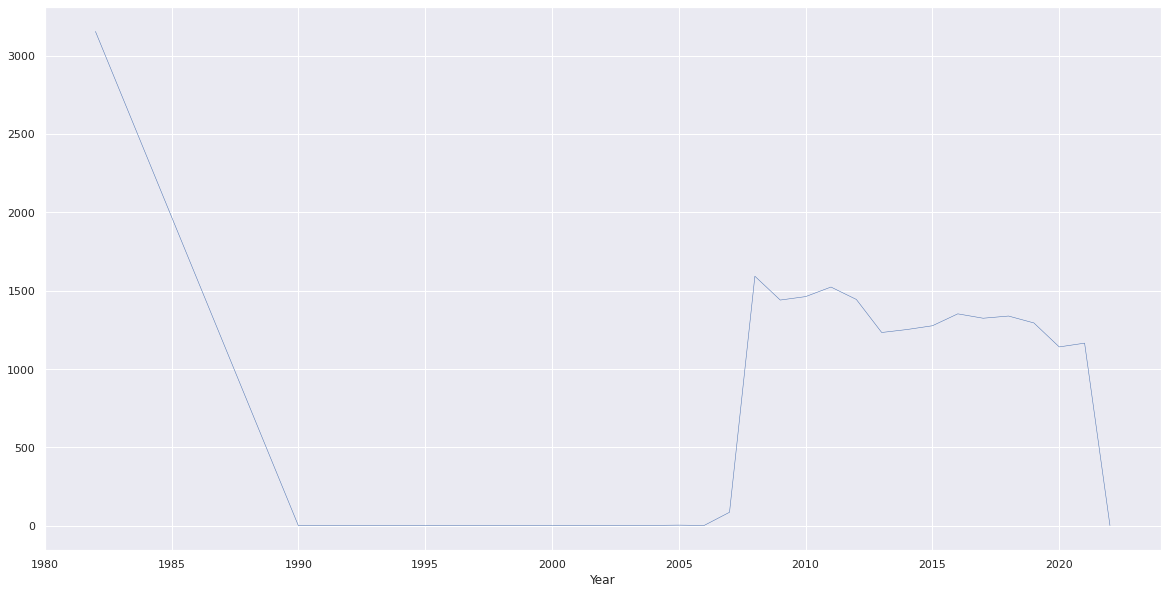

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
df['Total.Fatal.Injuries'].plot(linewidth=0.5);

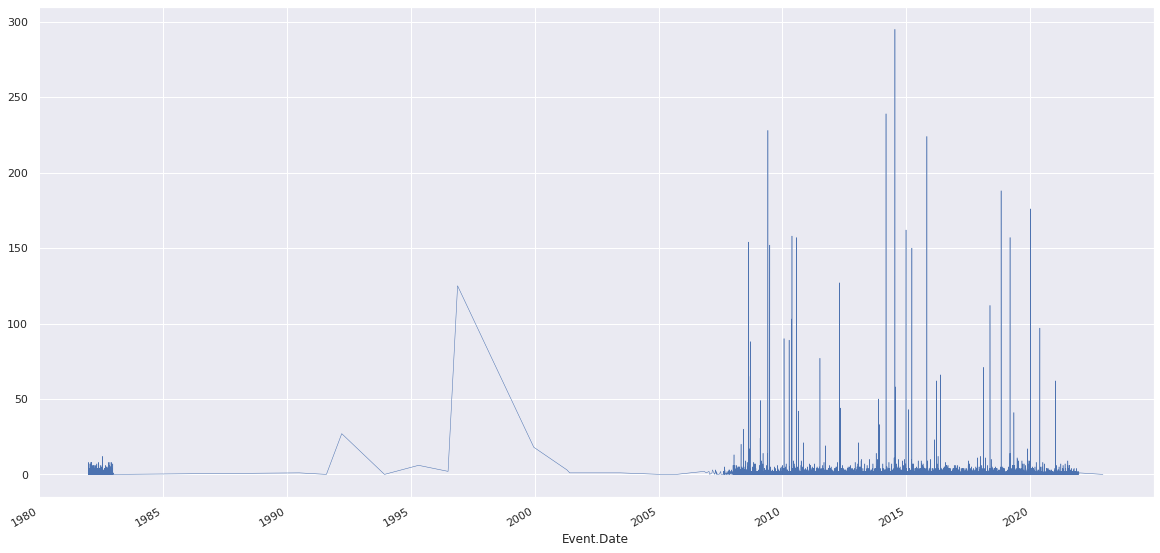

In [ ]:
# Use seaborn style defaults and set the default figure size
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 10)})
t_data['Total.Fatal.Injuries'].plot(linewidth=0.5);

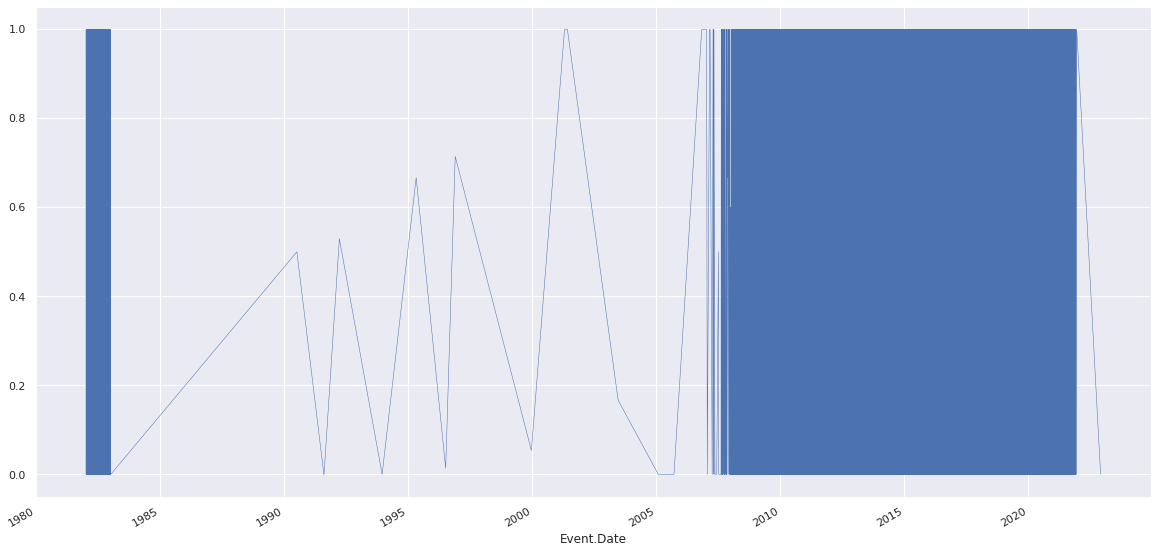

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
t_data['fatal.ratio'].plot(linewidth=0.5);

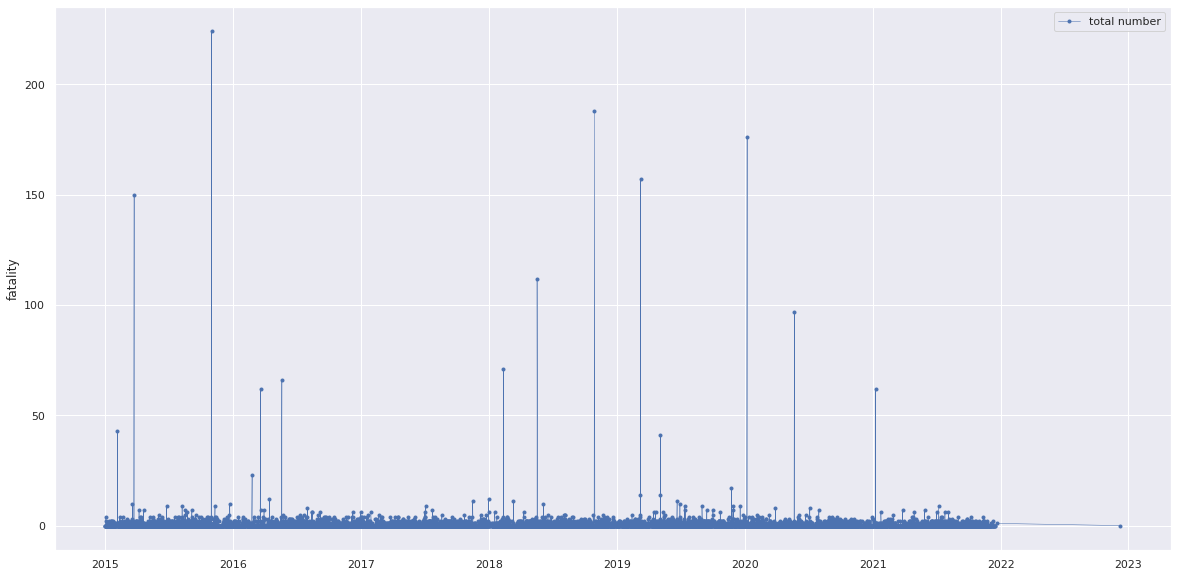

In [ ]:
start, end = '2015', '2022'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(t_data.loc[start:end, 'Total.Fatal.Injuries'],
marker='.', linestyle='-', linewidth=0.5, label='total number')
#ax.plot(t_data.loc[start:end, 'fatal.ratio'],
#marker='o', markersize=8, linestyle='-', label='ratio')
ax.set_ylabel('fatality')
ax.legend();

In [ ]:
# 2017년(59명) 역대 최저 
# 

In [ ]:
ax = t_data.loc['2020', 'Total.Fatal.Injuries', 'fatal.ratio'].plot()
ax.set_ylabel('number of fatal injuries');

In [ ]:
# seasonality
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('GWh')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [ ]:
# more pretty
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# time vs demage 

In [ ]:
df = t_data[['Year','Aircraft.damage']]

In [ ]:
df.groupby(['Year'])['Aircraft.damage'].value_counts()

Year  Aircraft.damage
1982  Substantial        2095
      Destroyed           909
      Minor               108
      Unknown              42
1990  Destroyed             1
                         ... 
2021  Substantial         917
      Destroyed           141
      Unknown              80
      Minor                27
2022  Substantial           1
Name: Aircraft.damage, Length: 80, dtype: int64